In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [6]:
%config IPCompleter.greedy = True

In [80]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
# Checking for missing values
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

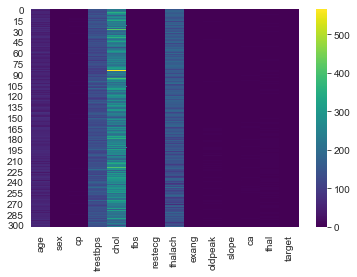

In [84]:
sns.heatmap(data, cbar = True, cmap = 'viridis');

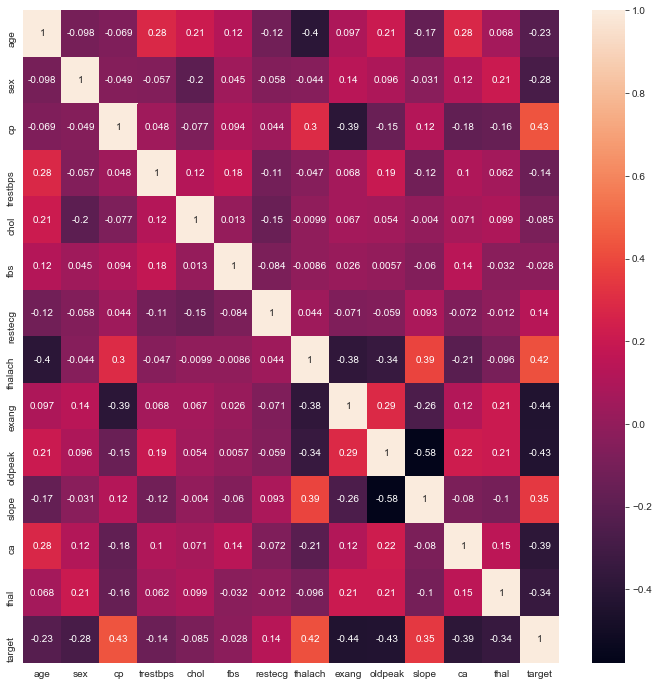

In [85]:
# Feature Selection (will give corelation of each feature in the data set)
cor_mat = data.corr()
#cor_mat
top_cor_features = cor_mat.index
plt.figure(figsize = (12,12) )
sns.heatmap(data[top_cor_features].corr(), annot = True)
plt.show()

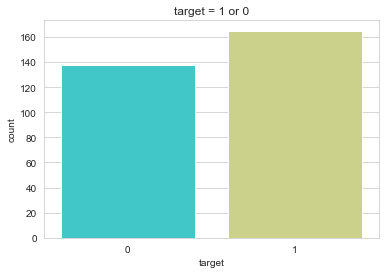

In [86]:
#Checking the size of target class if equal or not
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data, palette = 'rainbow');
plt.title('target = 1 or 0');

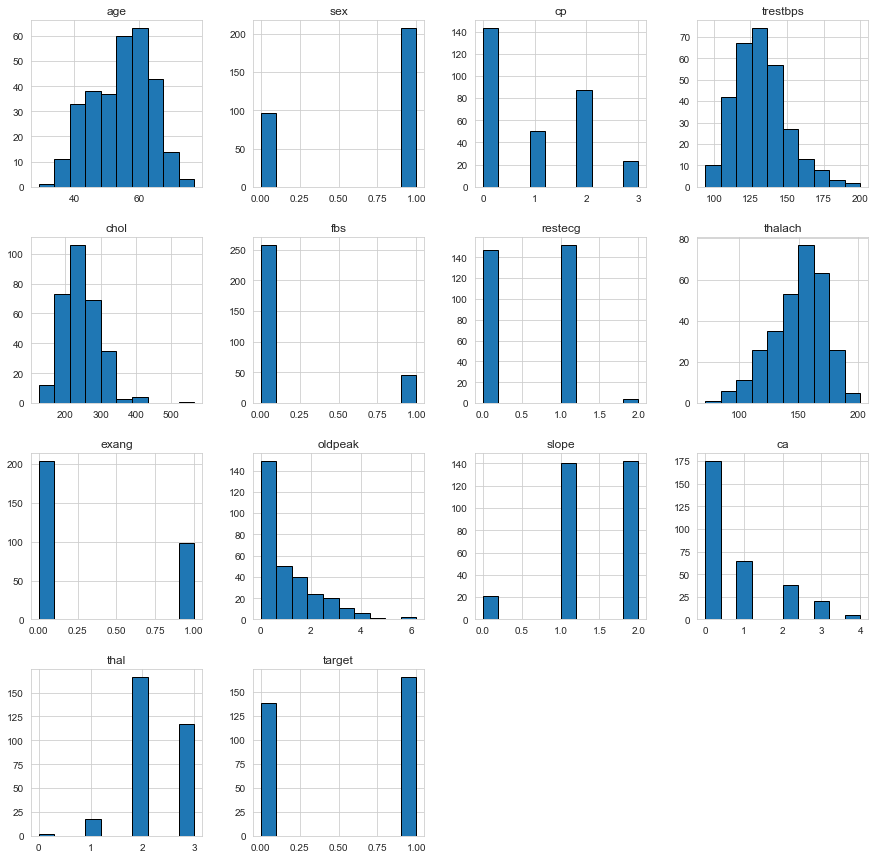

In [87]:
data.hist(figsize=(15,15), edgecolor='black');

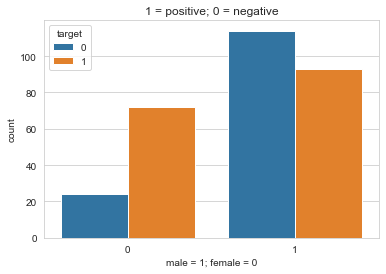

In [88]:
sns.countplot(x = 'sex', hue = 'target', data = data);
plt.title('1 = positive; 0 = negative');
plt.xlabel('male = 1; female = 0');

77 yrs is the oldest person in the dataset
29 yrs is the youngest person in the dataset


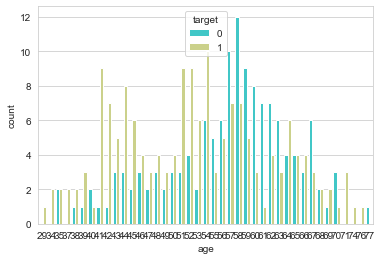

In [89]:
sns.countplot(x = 'age', hue = 'target', data = data, palette = 'rainbow');
print(data['age'].max(), 'yrs is the oldest person in the dataset')
print(data['age'].min(), 'yrs is the youngest person in the dataset')

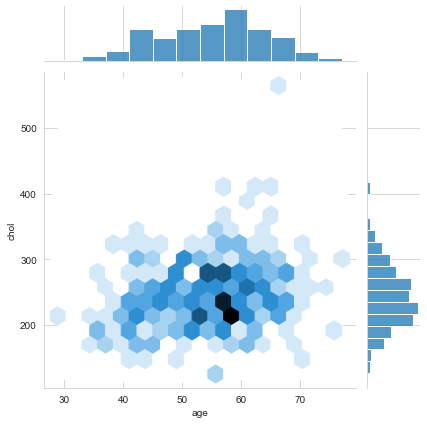

In [90]:
# Distribution of age and ppl having cholestrol
sns.jointplot(x = 'age', y = 'chol', data = data, kind = 'hex');

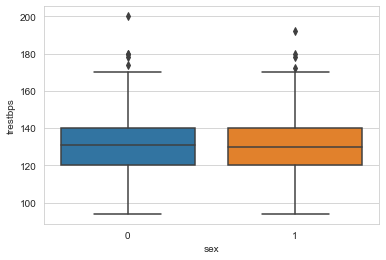

In [91]:
# gender vs ppl with blood pressure at rest
sns.boxplot(x = 'sex', y = 'trestbps', data = data);

In [92]:
# Data Processing :
# now separating my independent ariables(X) from my dependent output (y)
# X is age trestbps chol thalach oldpeak, scaling these to standard values
# using Standard Scaler and Y is my target which says heart disease present
# or not

In [93]:
# using the get_dummies method to create dummy columns for categorical variables

dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'exang',
                                         'slope', 'ca', 'thal'])

In [94]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[cols_to_scale] = standardScaler.fit_transform(dataset[cols_to_scale])

dataset.head()

,age,trestbps,chol,restecg,thalach,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0,0.015443,1.087338,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1,1.633471,2.122573,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0,0.977514,0.310912,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1,1.239897,-0.206705,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,1,0.583939,-0.379244,1,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [95]:
X = dataset.drop(['target'], axis = 1)
y = dataset['target']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())    

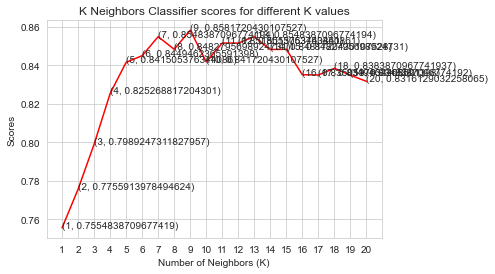

<Figure size 1080x1080 with 0 Axes>

In [98]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.figure(figsize = (15,15))
plt.show()

In [99]:
knn_classifier = KNeighborsClassifier(n_neighbors = 11)
score = cross_val_score(knn_classifier, X, y, cv = 10)
score.mean() * 100

85.15053763440861

In [100]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators = 250)
score=cross_val_score(randomforest_classifier, X, y, cv=10)
score.mean() * 100

83.46236559139784

In [101]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [103]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred) * 100)

Gaussian Naive Bayes model accuracy(in %): 85.24590163934425


In [106]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators = 150, base_estimator = classifier, learning_rate = 0.1, random_state = 0)
AdaBoost.fit(X_train, y_train)
y_pred_Ada = AdaBoost.predict(X_test)
print("Model Accuracy with NB Base Estimator:", metrics.accuracy_score(y_test, y_pred_Ada) * 100)

Model Accuracy with NB Base Estimator: 88.52459016393442
